In [1]:
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train2/weights/best.pt'
model = YOLO(model_path)

# metrics = model.val(
#     project = 'models',
#     name = 'yolov8/detect/val'
# )

Ultralytics YOLOv8.1.45  Python-3.10.4 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning D:\Python code\Computer Vision\sign_detect\data\val\labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


                   all          5          8      0.932      0.993      0.995      0.978
             Left_Sign          5          4      0.928          1      0.995      0.995
            Right_Sign          5          2          1      0.979      0.995      0.945
             Stop_Sign          5          2      0.868          1      0.995      0.995
Speed: 1.6ms preprocess, 225.7ms inference, 0.0ms loss, 263.3ms postprocess per image
Results saved to models\yolov8\detect\val3


In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import json
test_img_dir = 'data/test'
# test_img_dir = 'data/val/images'

def visualize_bbox(
        img_path, predictions,
        conf_thres = 0.8,
        font = cv2.FONT_HERSHEY_SIMPLEX
):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)
    h, w = img.shape[:2]

    for prediction in predictions:
        conf_score = prediction['confidence']

        if conf_score < conf_thres:
            continue
            
        bbox = prediction['box']
        name = prediction['name']
        xmin = int(bbox['x1'])
        ymin = int(bbox['y1'])
        xmax = int(bbox['x2'])
        ymax = int(bbox['y2'])
        font_size = 0.7


        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)

        text =name + "-conf: " + f"{conf_score:.2f}"
        
        (text_width, text_height), _ = cv2.getTextSize(text, font, font_size, 2)

        cv2.rectangle(img, (xmin, ymin - text_height - 5), (xmin + text_width, ymin), (0,255,0), -1)
        cv2.putText(img, text, (xmin, ymin -5), font, font_size, (0,0,0),2)

    return img

(480, 640, 3)


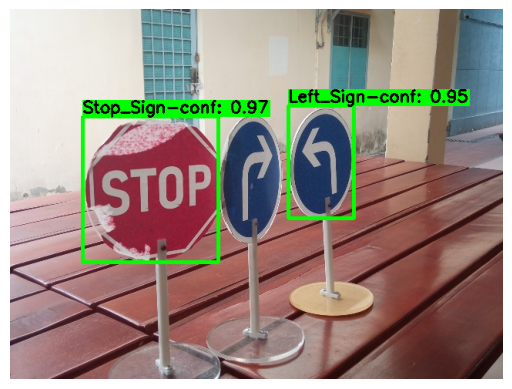

(480, 640, 3)


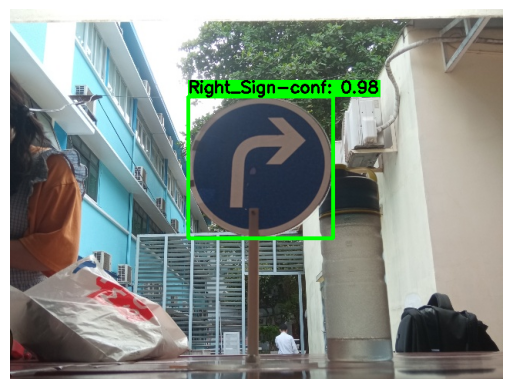

(480, 640, 3)


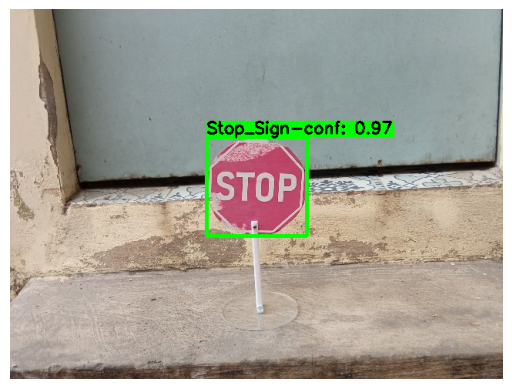

In [3]:
conf_thres =0.75
model = YOLO(model_path)
for img_name in os.listdir(test_img_dir):
    img_path = os.path.join(test_img_dir,img_name)
    # Run inference
    results = model(img_path, verbose = False)
    # print(results)
    predictions = json.loads(results[0].tojson())
    visualized_img = visualize_bbox(img_path, predictions ,conf_thres)
    %matplotlib inline
    plt.imshow(visualized_img)
    plt.axis('off')
    plt.show()
